# Run Length Encoding: Annotation Data to Mask Image
This notebook refferred to INVERSION's notebook'Run Length Decoding - Quick Start'.<br/>
https://www.kaggle.com/inversion/run-length-decoding-quick-start

### What is Run-length encoding (RLE)?
```
Run-length encoding (RLE) is a form of lossless data compression in which runs of data (sequences in which the same data value occurs in many consecutive data elements) are stored as a single data value and count, rather than as the original run. This is most efficient on data that contains many such runs, for example, simple graphic images such as icons, line drawings, Conway's Game of Life, and animations. For files that do not have many runs, RLE could increase the file size. (from Wikipedia)
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
train = os.listdir('../input/sartorius-cell-instance-segmentation/train')
print(len(train))

606


In [3]:
# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
def rle_decode(mask_rle, shape=(520,704)):   # (height,width) 
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape) 

In [4]:
masks = pd.read_csv('../input/sartorius-cell-instance-segmentation/train.csv')
masks

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
...,...,...,...,...,...,...,...,...,...
73580,ffdb3cc02eef,3610 3 4311 7 5014 9 5717 11 6420 13 7123 15 7...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00
73581,ffdb3cc02eef,341585 2 342287 5 342988 10 343690 13 344394 1...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00
73582,ffdb3cc02eef,47788 3 48490 7 49192 11 49896 13 50599 14 513...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00
73583,ffdb3cc02eef,333290 1 333993 2 334696 4 335399 5 336102 6 3...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00


In [5]:
ImageId = '0030fd0e6378'
img = cv2.imread('../input/sartorius-cell-instance-segmentation/train/' + ImageId+'.png')
print(img.shape)

(520, 704, 3)


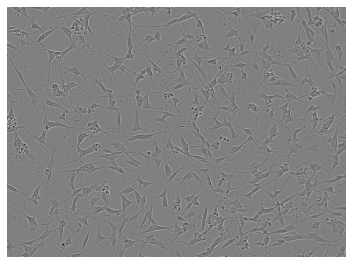

In [6]:
fig, axarr = plt.subplots(figsize=(5,5))
axarr.axis('off')
axarr.imshow(img)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

In [7]:
img_masks = masks[masks['id']==ImageId]['annotation'].tolist()
print(len(img_masks))
print(img_masks[0])

395
118145 6 118849 7 119553 8 120257 8 120961 9 121665 10 122369 12 123074 13 123778 14 124482 15 125186 16 125890 17 126594 18 127298 19 128002 20 128706 21 129410 22 130114 23 130818 24 131523 24 132227 25 132931 25 133635 24 134339 24 135043 23 135748 21 136452 19 137157 16 137864 11 138573 4


In [8]:
all_masks = np.zeros((520,704))    #(height,width) 
for mask in img_masks:
    all_masks += rle_decode(mask)

print(all_masks.shape)

(520, 704)


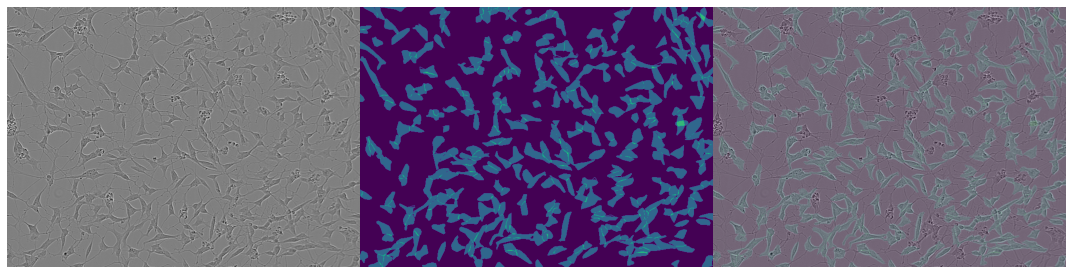

In [9]:
fig, axarr = plt.subplots(1,3, figsize=(15,40))

axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')

axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.2)

plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()